# Validation Notebook

<img align="right" width="150" height="150" src="https://id.dewberry.com/clients/Templates/DewberryLogo_RGB.png">

### - Validating ADCIRC runs with tide gauge data

 - Validate by comparing [NOAA](https://tidesandcurrents.noaa.gov/map/index.shtml?region=North%20Carolina) Tide Gauges with the ADCIRC model outputs.
 - The current project (06/2018) has 3 tidal gauges in the immediate area

In [1]:
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.plotly as py
import plotly.offline as offline
import plotly.graph_objs as go
import glob
from importlib import reload
import library; reload(library)
from library import *

Defined Variables and File Paths that will be used later on

In [2]:
root_adc = r'N:\TECH\COASTAL\NC_STORM_SURGE_MODELING_UPDATE\NC_TSDN\2_Engineering_Analyses\IDS_No_2'
adc_wright0, adc_duke0, adc_hatt0 = [],[],[]
adc_wright1, adc_duke1, adc_hatt1 = [],[],[]
hurricanes = []
adcirc0, adcirc1 = [],[]

Pre-Defined NOAA Tide Gauges and nodes in North Carolina

In [3]:
Hatteras = {'Hatteras':'station=8654467'}
Beaufort = {'Beaufort':'station=8656483'}
Wrightsville = {'Wrightsville':'station=8658163'}
Duck = {'Duck': 'station=8651370'}
Wilmington = {'Wilmington':'station=8658120'}
Oregon = {'Oregon':'station=8652587'}
stations = [Hatteras, Beaufort, Wrightsville, Duck, Wilmington, Oregon]

nodes_942 = {'324363':[],'116637':[],'72148':[]} # Beaufort, Wrightsville, Hatteras
nodes_17  = {'633957':[],'110216':[],'79973':[]} # Beaufort, Wrightsville, Hatteras

hurricanes = ['*Fran*','*Isabel*','*Ophelia*']

Find ADCIRC Hurricanes

In [4]:
adcirc0, adcirc1 = find_hurricanes(root_adc, hurricanes)

Read/plot NOAA and ADCIRC tide gauges for Hurricane Ophelia

In [21]:
table_adc0 = read_fort63(adcirc0[2], nodes_942)
table_adc1 = read_fort63(adcirc1[2], nodes_942)


 Started reading Global File at 

2018-06-21 14:55:53.584149
===========END========== 

Processing Time : 
0:02:31.527998

 Started reading Global File at 

2018-06-21 14:58:25.112147
===========END========== 

Processing Time : 
0:02:24.745393


In [22]:
dt = pd.date_range('09/06/2005 19:00','09/15/2005 19:00', freq='30Min')
adc_duke0, adc_wright0, adc_hatt0 = clean_fort(dt, table_adc0)
adc_duke1, adc_wright1, adc_hatt1 = clean_fort(dt, table_adc1)

begin_d = 'begin_date=20050907'
end_d = 'end_date=20050916'

ophelia_w = pd.read_csv(MakeDomain(begin_d, end_d, stations[2]['Wrightsville']))
ophelia_d = pd.read_csv(MakeDomain(begin_d, end_d, stations[1]['Beaufort']))
ophelia_h = pd.read_csv(MakeDomain(begin_d, end_d, stations[0]['Hatteras']))
ophelia_w.name, ophelia_d.name, ophelia_h.name = 'Obs. Wrightsville', 'Obs. Beaufort', 'Obs. Hatteras'

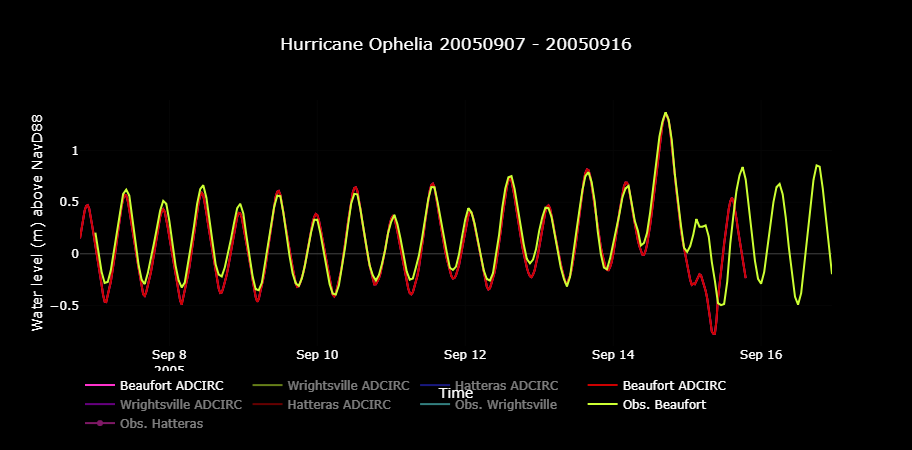

In [23]:
datasets = [adc_duke0, adc_wright0, adc_hatt0,adc_duke1, adc_wright1, adc_hatt1,ophelia_w, ophelia_d, ophelia_h,]
obs, dtm  = ' Water Level', 'Date Time'
beg = begin_d.split('=')[1] + ' - ' + end_d.split('=')[1]
title = 'Hurricane Ophelia' + ' ' + beg

data, layout = MakePlot(datasets, obs, dtm, title)
notebook=True
fig = go.Figure(data=data, layout=layout)
if not notebook:
    interactive = plot(fig)
else:
    interactive = iplot(fig)

Read/plot NOAA and ADCIRC tide gauges for Hurricane Isabel

In [5]:
table_adc0 = read_fort63(adcirc0[1], nodes_942)
table_adc1 = read_fort63(adcirc1[1], nodes_942)


 Started reading Global File at 

2018-06-25 09:06:37.794141
===========END========== 

Processing Time : 
0:01:41.647636

 Started reading Global File at 

2018-06-25 09:08:19.441777
===========END========== 

Processing Time : 
0:01:43.110354


In [8]:
dt = pd.date_range('09/13/2003 19:00','09/19/2003 6:00', freq='30Min')
adc_duke0, adc_wright0, adc_hatt0 = clean_fort(dt, table_adc0)
adc_duke1, adc_wright1, adc_hatt1 = clean_fort(dt, table_adc1)
begin_d = 'begin_date=20030914'
end_d = 'end_date=20030920'
isabel_w = pd.read_csv(MakeDomain(begin_d, end_d, stations[2]['Wrightsville']))
isabel_d = pd.read_csv(MakeDomain(begin_d, end_d, stations[1]['Beaufort']))
isabel_h = pd.read_csv(MakeDomain(begin_d, end_d, stations[0]['Hatteras']))
isabel_w.name, isabel_d.name, isabel_h.name = 'Obs. Wrightsville','Obs. Beaufort' , 'Obs. Hatteras'

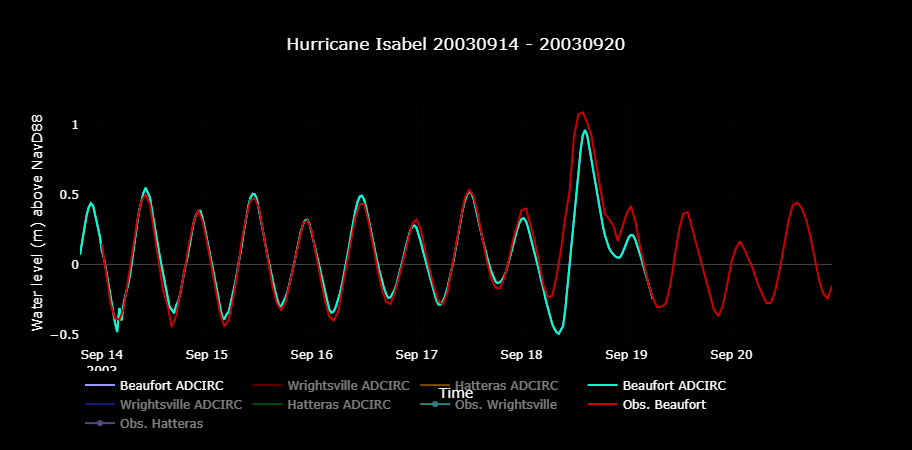

In [9]:
datasets = [adc_duke0, adc_wright0, adc_hatt0,adc_duke1, adc_wright1, adc_hatt1,isabel_w,isabel_d,isabel_h]
obs, dtm  = ' Water Level', 'Date Time'
beg = begin_d.split('=')[1] + ' - ' + end_d.split('=')[1]
title = 'Hurricane Isabel' + ' ' + beg
data, layout = MakePlot(datasets, obs, dtm, title)

fig = dict(data = data, layout=layout)
notebook=True
fig = go.Figure(data=data, layout=layout)
if not notebook:
    interactive = plot(fig)
else:
    interactive = iplot(fig)

Read/plot NOAA and ADCIRC tide gauges for Hurricane Fran

In [27]:
table_adc0 = read_fort63(adcirc0[0], nodes_942)
table_adc1 = read_fort63(adcirc1[0], nodes_942)


 Started reading Global File at 

2018-06-21 15:05:56.593046
===========END========== 

Processing Time : 
0:01:59.374332

 Started reading Global File at 

2018-06-21 15:07:55.967378
===========END========== 

Processing Time : 
0:01:58.526637


In [28]:
dt = pd.date_range('08/29/1996 18:30','09/05/1996 18:30', freq='30Min')
adc_duke0, adc_wright0, adc_hatt0 = clean_fort(dt, table_adc0)
adc_duke1, adc_wright1, adc_hatt1 = clean_fort(dt, table_adc1)
begin_d = 'begin_date=19960830'
end_d = 'end_date=19960906'

fran_w = pd.read_csv(MakeDomain(begin_d, end_d, stations[2]['Wrightsville']))
fran_d = pd.read_csv(MakeDomain(begin_d, end_d, stations[1]['Beaufort']))
fran_h = pd.read_csv(MakeDomain(begin_d, end_d, stations[0]['Hatteras']))
fran_w.name, fran_d.name, fran_h.name = 'Wrightsville', 'Beaufort','Hatteras'

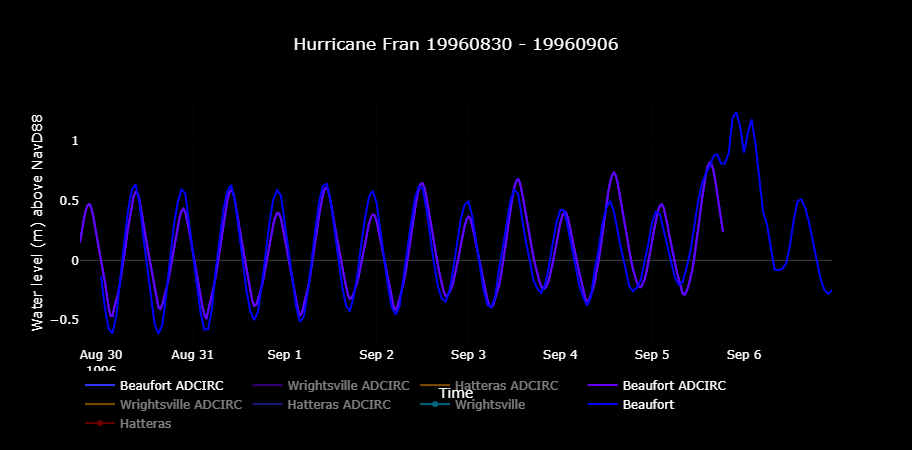

In [29]:
datasets = [adc_duke0, adc_wright0, adc_hatt0,adc_duke1, adc_wright1, adc_hatt1,fran_w,fran_d,fran_h]
obs, dtm  = ' Water Level', 'Date Time'
beg = begin_d.split('=')[1] + ' - ' + end_d.split('=')[1]
title = 'Hurricane Fran' + ' ' + beg
data, layout = MakePlot(datasets, obs, dtm, title)

fig = dict(data = data, layout=layout)
notebook=True
fig = go.Figure(data=data, layout=layout)
if not notebook:
    interactive = plot(fig)
else:
    interactive = iplot(fig)